# Predict apartment price in Victoria using Regression
##### by Putri Bunga Rahmalita


Tony who has profession as a broker wants to predict apartment price in Victoria based on living area environment and apartment conservation status. Determine the best model to predict and redefine new conservation variable in 3 level : <br>
A = 1A, B = 2A, C = 2B and 3A.
<br><br>
The Dataset provides living area and conservation status. There are 218 observations and 16 variables.

## Import Package

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [56]:
data = pd.read_csv("victoria.csv")
data.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


## Exploratory Data Analysis: Create summary of the dataset, with python function. (mean, median, modus, max, min, range)

#### The code below is to know dimension of data

In [57]:
data.shape

(218, 16)

#### Summary of numerical data
(you will know count, mean, standard deviation, min value, Q1, Q2(median), Q3, and max value from the data) 

In [30]:
data.describe()

,row.labels,age,floor,rooms,toilets,garage,elevator,tras
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,109.500000,19.899083,4.440367,4.853211,1.467890,0.243119,0.798165,0.807339
std,63.075352,14.595590,2.126988,0.634285,0.500116,0.450881,0.402293,0.406787
min,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,55.250000,11.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
50%,109.500000,16.000000,4.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,163.750000,24.000000,5.000000,5.000000,2.000000,0.000000,1.000000,1.000000
max,218.000000,118.000000,12.000000,7.000000,2.000000,2.000000,1.000000,2.000000


#### Summary of categorical data
(you will know count, unique, top (mode), freq (frequency top value))

In [31]:
data.describe(include='object')

,totalprice,area,zone,category,out,conservation,streetcategory,heating
count,218,218,218,218,218,218,218,218
unique,155,207,23,7,4,4,4,4
top,270000,868199997,Z41,3B,E100,1A,S3,3A
freq,7,2,18,77,122,161,107,149


#### The code below is to know data types from each features

In [32]:
data.dtypes

row.labels         int64
totalprice        object
area              object
zone              object
category          object
age                int64
floor              int64
rooms              int64
out               object
conservation      object
toilets            int64
garage             int64
elevator           int64
streetcategory    object
heating           object
tras               int64
dtype: object

#### Using regex to matching pattern in text and modifying string

In [58]:
data['totalprice'] = data['totalprice'].replace(r'[,]','', regex=True)
data['area'] = data['area'].replace(r'[,]','', regex=True)

#### Change data types for several features from object to numeric

In [59]:
data['totalprice'] = pd.to_numeric(data['totalprice'])
data['area'] = pd.to_numeric(data['area'])

#### Check the missing value from each features

In [35]:
data.isnull().sum()

row.labels        0
totalprice        0
area              0
zone              0
category          0
age               0
floor             0
rooms             0
out               0
conservation      0
toilets           0
garage            0
elevator          0
streetcategory    0
heating           0
tras              0
dtype: int64

From the result above it can be seen that there is no missing value in the data.

#### Show the data

In [36]:
data.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1


## Data Visualization: Create any kind suitable plot of dataset, it will provide a lot of insight into the problem.

### A. Univariate Analysis
analysis carried out for one variable.

### Histogram of conservation features

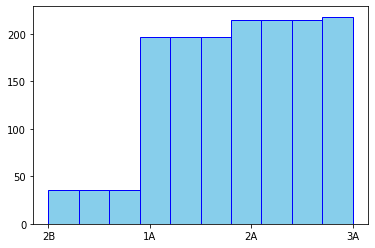

In [37]:
plt.hist(data['conservation'], facecolor='skyblue', edgecolor='blue', bins=10, cumulative=True)
plt.show()

From the histogram above can be concluded that conservation 3A more than others

### Distribution Plot of total price features

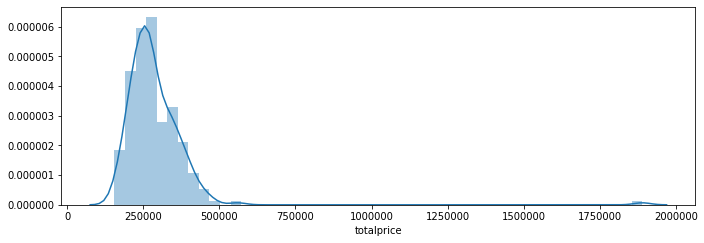

In [85]:
f=plt.figure(figsize=(25,8))
f.add_subplot(2,2,1)
sns.distplot(data['totalprice'])

From the distribution above can be concluded that mode price of apartment in the price range of 200000-30000

### Bar Plot of several features (floor, rooms, streetcategory, category)

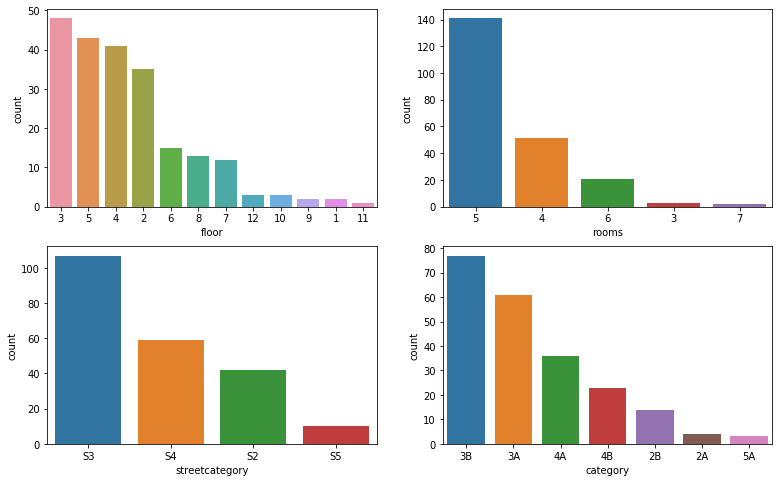

In [41]:
f=plt.figure(figsize=(13,8))
f.add_subplot(2,2,1)
sns.countplot(data['floor'],order=data['floor'].value_counts().index)
f.add_subplot(2,2,2)
sns.countplot(data['rooms'],order=data['rooms'].value_counts().index)
f.add_subplot(2,2,3)
sns.countplot(data['streetcategory'],order=data['streetcategory'].value_counts().index)
f.add_subplot(2,2,4)
sns.countplot(data['category'],order=data['category'].value_counts().index)

From bar plot above can be known :<br>
    1. 3rd floor is the most widely available units
    2. 5 rooms are the most avaibale apartment units
    3. Many units are on streetcategory S3
    4. Many units are on category 3B
With the above bar plot it can be for apartment units that have criteria like the conclusion above can be given a cheaper price to quickly sell

### Bar plot of zone

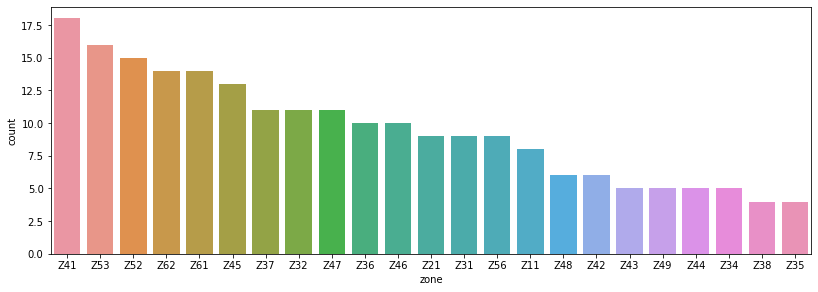

In [42]:
f=plt.figure(figsize=(30,10))
f.add_subplot(2,2,1)
sns.countplot(data['zone'],order=data['zone'].value_counts().index)

From the bar plot above can be known that in zone Z41 there are many units that can be sold. So for apartment in zone Z41 can be given a cheaper price.

### Pie Chart of toilets

<function matplotlib.pyplot.show>

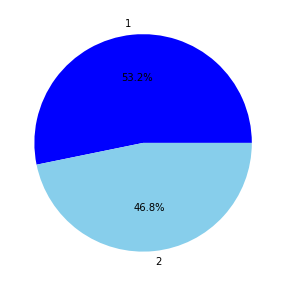

In [54]:
toilet = data['toilets'].value_counts()
colors = ['blue', 'skyblue']
plt.figure(figsize=(5,5))
plt.pie(toilet, labels=toilet.index, autopct='%1.1f%%',colors=colors)
plt.show

From the pie chart above can be known that one toilets more in the apartment unit.

### Pie Chart of garage

<function matplotlib.pyplot.show>

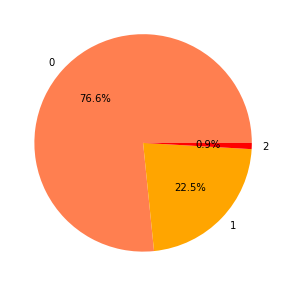

In [68]:
garage = data['garage'].value_counts()
colors = ['coral', 'orange','red']
plt.figure(figsize=(5,5))
plt.pie(garage, labels=garage.index, autopct='%1.1f%%',colors=colors)
plt.show

From the pie chart above can be known that no garage more in the apartment unit. So, the target marketing for selling apartment units is better for people who don't have vehicles so that units that don't have a garage can be sold. Or you can also make a parking area for the residents of the apartment

### Pie Chart of elevator

<function matplotlib.pyplot.show>

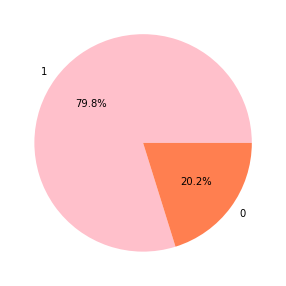

In [57]:
garage = data['elevator'].value_counts()
colors = ['pink', 'coral']
plt.figure(figsize=(5,5))
plt.pie(garage, labels=garage.index, autopct='%1.1f%%',colors=colors)
plt.show

From the pie chart above can be known that one elevator more in the apartment unit.

### Pie Chart of Unit Apartment Age

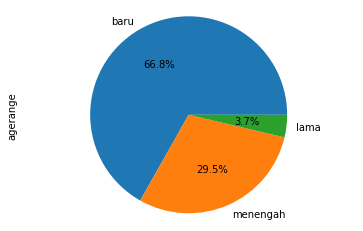

In [69]:
age = [1,20,50,np.inf]
label = ['new','average','longtime']
data['agerange'] = pd.cut(data['age'], age, labels=label)
data['agerange'].value_counts().plot.pie(autopct = '%1.1f%%' )
plt.axis('equal')
plt.show()

From the pie chart above can be known that new apartment unit is more than others.

### B. Bivariate Analysis
Analysis that uses two features to find out the relationship contained in the two features

### Correlation with Heatmap

#### create correlation

In [43]:
corr = data.corr(method = 'pearson')

#### convert correlation to numpy array

In [44]:
mask = np.array(corr)

#### to mask the repetitive value for each pair

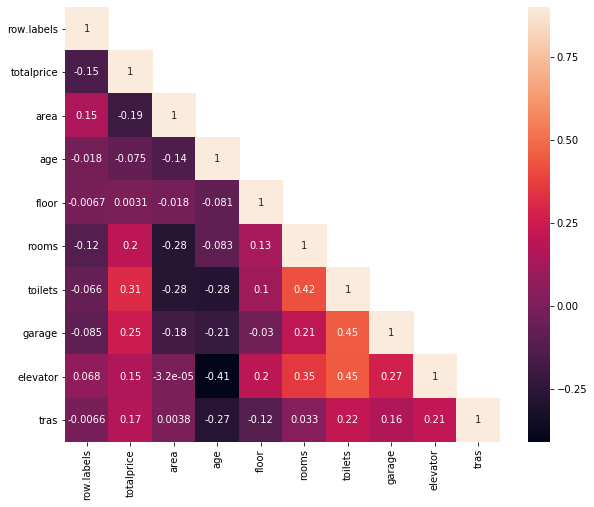

In [45]:
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (8,8))
fig.set_size_inches(10,8)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

From the heatmap above can be known that there is a correlation between several features, such as total price with toilets, garage, elevator, rooms and several features others. And can be seen that several features has no correlation, like age features with other features that can be concluded that the age of the apartment does not affect the existing facilities in the apartment unit.

### Pairplot of each features to know the correlation between some features

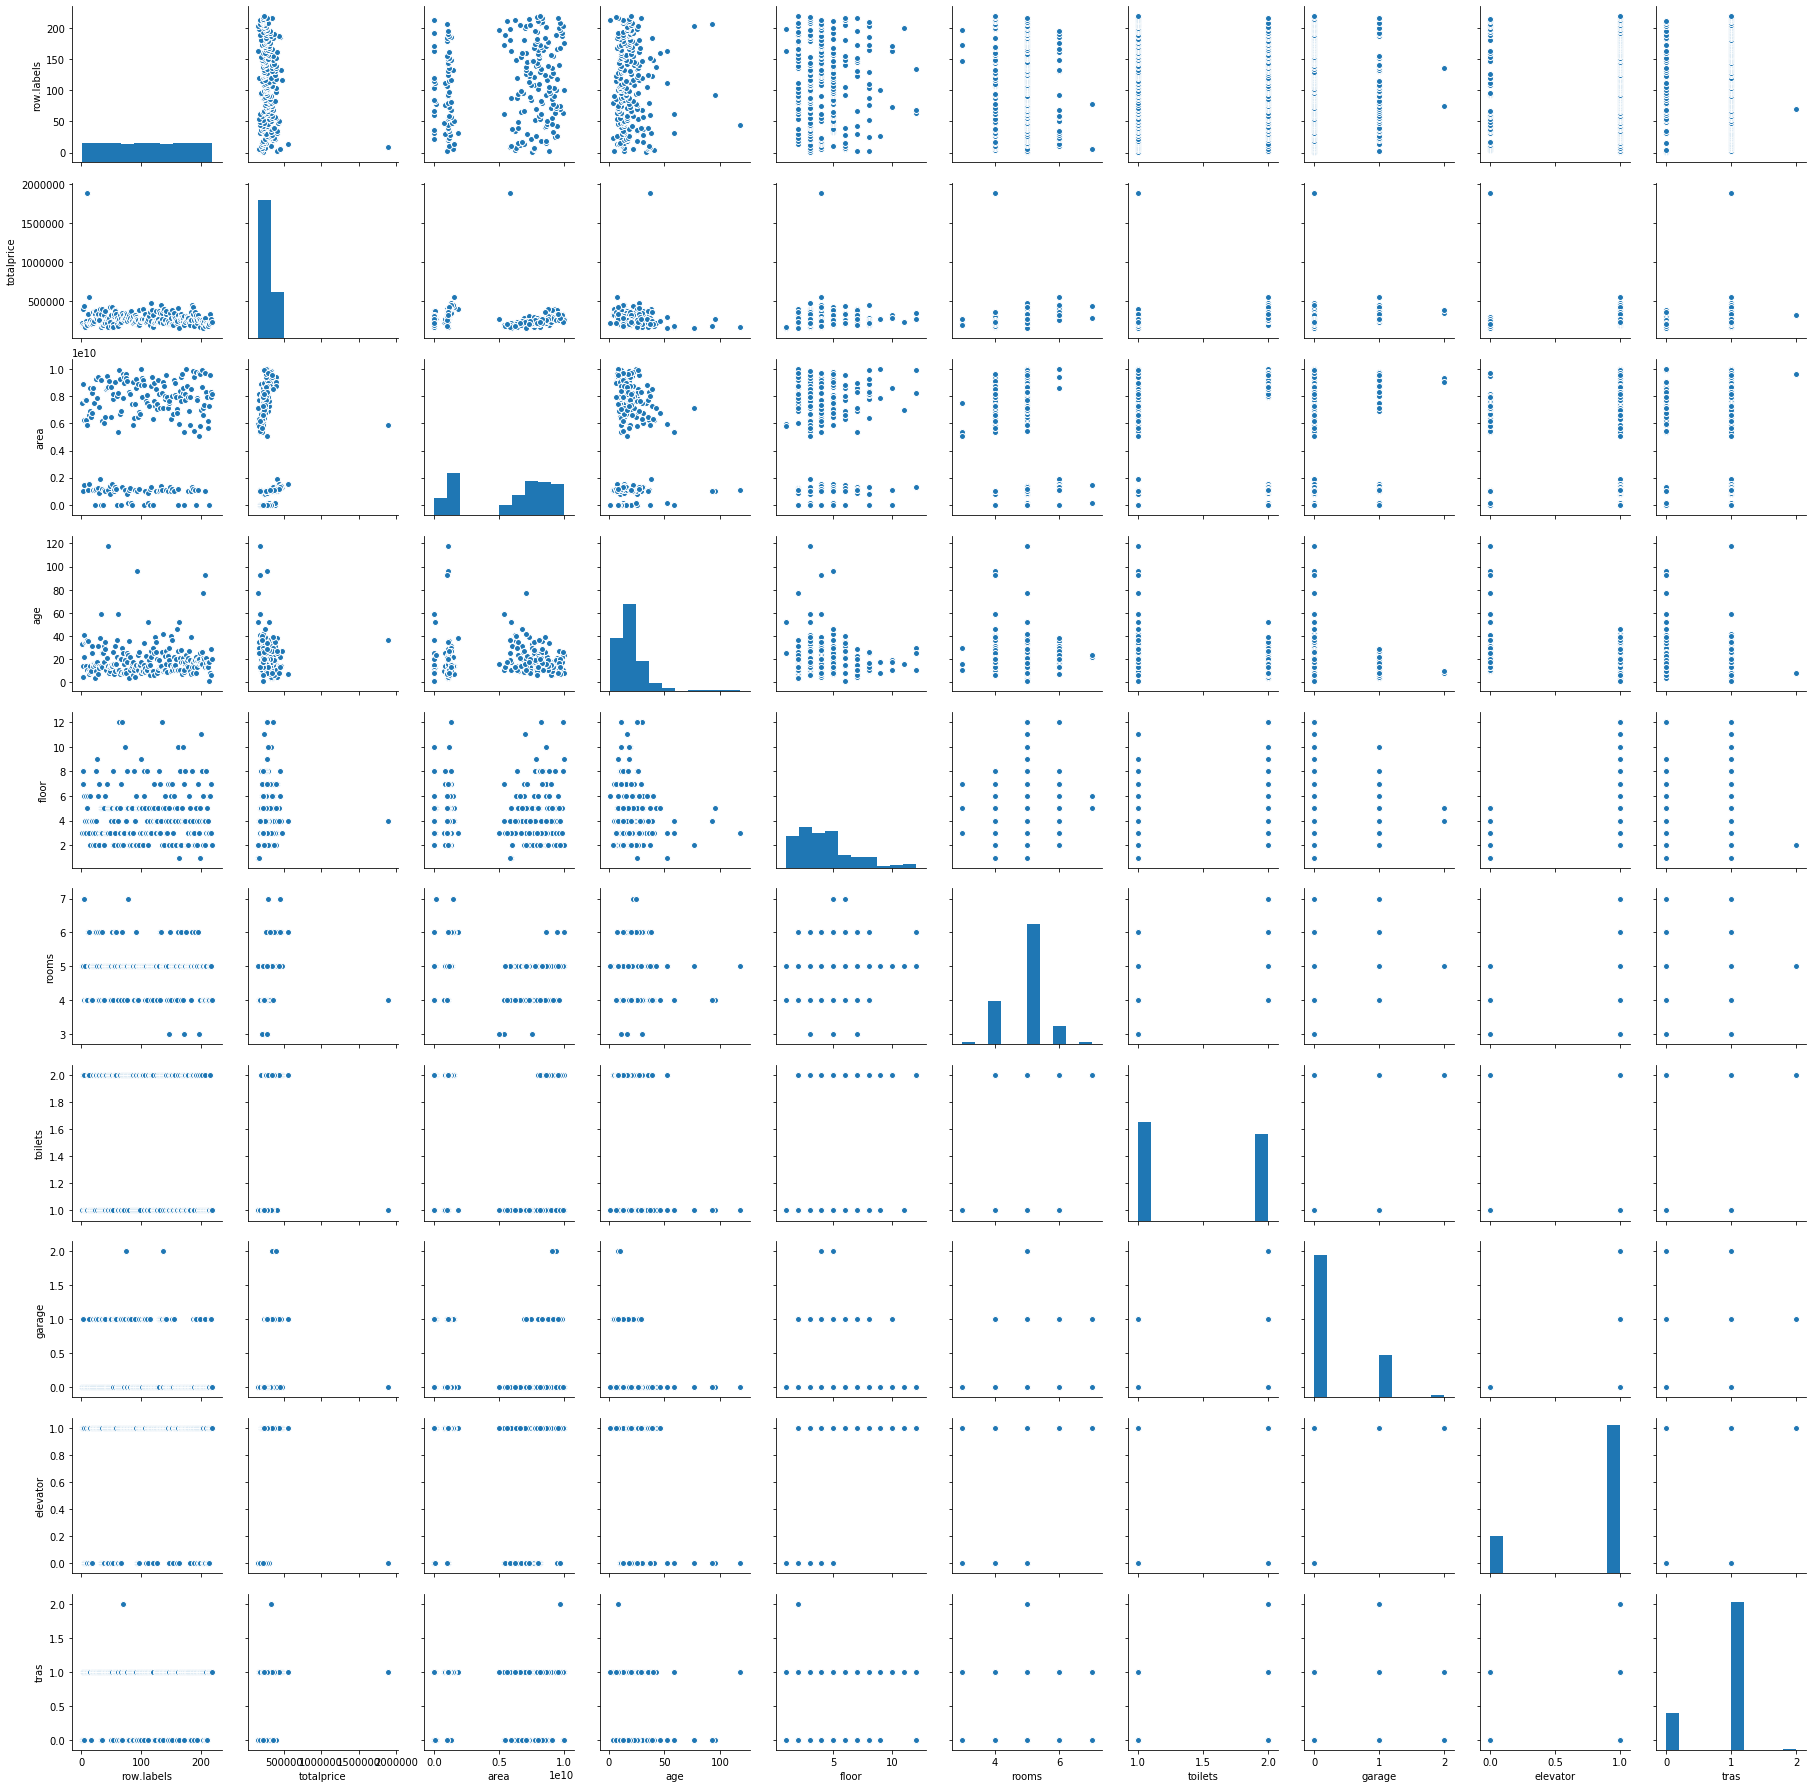

In [24]:
sns.pairplot(data)

### Bar Plot of several features that associated with totalprice

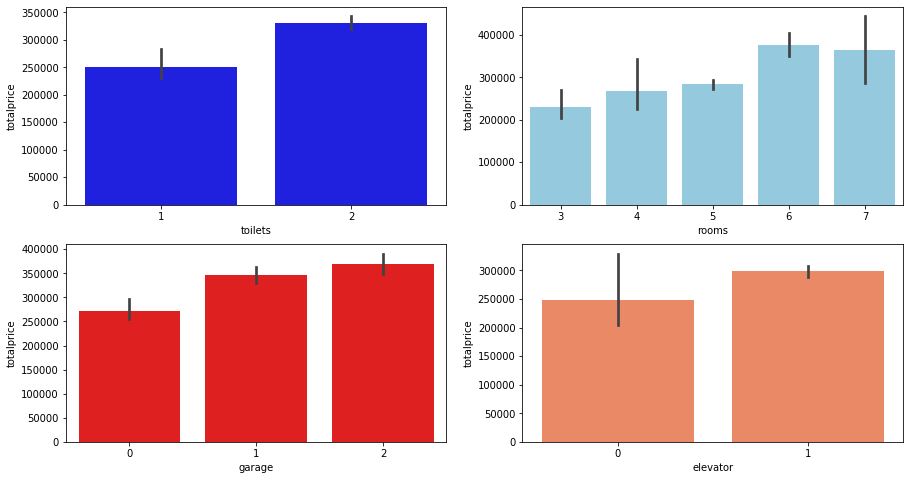

In [48]:
f=plt.figure(figsize=(15,8))
f.add_subplot(2,2,1)
sns.barplot(data=data, x=data['toilets'], y=data['totalprice'], color='blue')
f.add_subplot(2,2,2)
sns.barplot(data=data, x=data['rooms'], y=data['totalprice'], color='skyblue')
f.add_subplot(2,2,3)
sns.barplot(data=data, x=data['garage'], y=data['totalprice'], color='red')
f.add_subplot(2,2,4)
sns.barplot(data=data, x=data['elevator'], y=data['totalprice'], color='coral')

For the bar plot above can be known that totalprice have corralation with each features. Conclusion :
    1. Two toilets are more expensive than one toilet,
    2. The more rooms there are in an apartment unit, the more expensive the unit is,
    3. the more garages there are in apartment units, the more expensive the unit is, and the cheapest units are those that 
    do not have a garage,
    4. Apartment units that have elevators are more expensive than units that do not have elevators

## Variable Selection: Choose the variable and its reason.

#### Change conservation value

In [60]:
conservation = {
    '2B':3,
    '3A':3,
    '2A':2,
    '1A':1
}
data['conservation'] =  data['conservation'].replace(conservation)

In [61]:
newdata = data.copy()

In [62]:
newdata.head()

,row.labels,totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,tras
0,1,228000,7530999756,Z45,4B,33,3,5,E100,3,1,0,1,S3,3A,0
1,2,409000,1006500015,Z31,3B,5,7,5,E50,1,2,1,1,S5,4A,1
2,3,200000,8887000275,Z52,3A,14,8,5,E50,1,2,0,1,S2,3A,0
3,4,180000,6261000061,Z62,4A,41,3,4,E50,2,1,0,0,S3,1A,0
4,5,443600,1461499939,Z31,3A,22,6,7,E100,1,2,0,1,S4,4A,1


#### Drop unuse columns

In [63]:
drop = ['row.labels','zone', 'category', 'out', 'streetcategory', 'heating','age']
newdata.drop(columns=drop, inplace=True)

#### Make one hot encoding

In [64]:
newdata['conservation'] = pd.Categorical(newdata['conservation'])
newdata = pd.get_dummies(newdata)

In [65]:
newdata.head()

,totalprice,area,floor,rooms,toilets,garage,elevator,tras,conservation_1,conservation_2,conservation_3
0,228000,7530999756,3,5,1,0,1,0,0,0,1
1,409000,1006500015,7,5,2,1,1,1,1,0,0
2,200000,8887000275,8,5,2,0,1,0,1,0,0
3,180000,6261000061,3,4,1,0,0,0,0,1,0
4,443600,1461499939,6,7,2,0,1,1,1,0,0


## Modelling: Create models using Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Using Linear Regression

In [67]:
lin_reg = LinearRegression()

#### Initialize x and y variables

In [68]:
x = newdata.drop(columns = ['totalprice'])
y = newdata['totalprice']

#### Split data into train and test by comparison 80% for train and 20% for test

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Training model

In [70]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Make a prediction

In [71]:
y_pred = lin_reg.predict(x_test)

### Compare predict value with actual value

In [79]:
df_new = pd.DataFrame(y_pred, columns=['predict'])

In [81]:
df_new['actual'] = y_test.values

In [83]:
df_new.head()

,predict,actual
0,250517.827779,268000
1,242538.204487,228000
2,229497.036831,223200
3,223485.265800,236000
4,298123.263521,314000


## Accuracy or Error: Calculate the Error using the helper function from the library, from dataset only

In [108]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [109]:
print(f'MAE : {mean_absolute_error(y_pred, y_test)}')
print(f'MAPE : {mean_absolute_percentage_error(y_test, y_pred)})')

Nilai MAE 62649.52279967829
Nilai MAPE 23.841610699135014)


MAE value represents the average error between the prediction results with the actual value.<br>
MAPE value represents the precentage of average error.

# Conclusion
For the dataset MAE and MAPE value is relatively low. It means value between the prediction results with the actual value not much different.<br>
From the visualization above that insight can be taken that for the sale of apartments can be sold from apartment units that have a large amount and at a low price. For example, marketing can increase sales from unit apartment that in 2-5 floors, 4-6 rooms, on streetcategory S3 and category B3, have 1 toilet, no garage, and have elevator. But we must know customer segmentation for the best result that can be offer to customers.
And another way is to create some package or name for customer who want buy apartment. For example :
- Studio room : In 8-11 floor, S3/S4 streetcategory, 3B/3A/4A category, have 1 toilet, no garage, no elevator, have 3-4 rooms
- Family room : In 4-7 floor, S4/S2 streetcategory, 4A/4B/2B category, have 2 toilet, 2 garage, with elevator, have 5-7 rooms
- Luxury room : In 1-3, S5 streetcategory, 5A/2A/2B category, have 1 toilet, 1 garage, with elevator, have 3-5 rooms

## Example for picture unit apartment

### Studio Room

![studio](https://s3-us-west-2.amazonaws.com/mktapts/images/material/756CC6/floorplans/Par.jpg)

### Family Room

![family](http://kmidraughting.co.za/plans/PL0011T_2.jpg)

### Luxury Room

![luxury](http://cdn.home-designing.com/wp-content/uploads/2014/07/small-3-bedroom-house-plan.jpeg)